In [1]:
import numpy as np
import tensorflow as tf
import keras
import numpy as np
import os
import seaborn as sns
%load_ext autoreload
%autoreload 2
%matplotlib inline

import matplotlib.pyplot as plt
plt.rcParams['image.cmap'] = 'gray'
from sklearn import metrics, preprocessing

import AAPutils
import utils

a)Carga de datos

In [2]:
from keras.datasets import mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()

b)Visualización

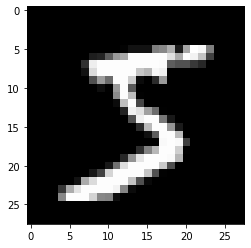

In [3]:
plt.imshow(X_train[0, :,:]/255,vmin=0, vmax=1)
# X_train[0, :,:]/255

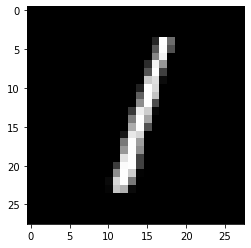

In [4]:
#Para ver la tercera image ndel conjunto de prueba:
plt.imshow(X_test[2, :,:])

Implementá un código que visualice 8 imágenes de cada clase en una grilla de 8x10. Utiliza la función subplots de matplotlib.pyplot para generar la grilla

In [5]:
# obtenemos 10 elementos de cada clase
selection = {}
keys = np.unique(y_train)
# 1 arreglo por cada clase, nos indica el indice
for i in keys:
    selection[i] = X_train[y_train==i][0:8,:]

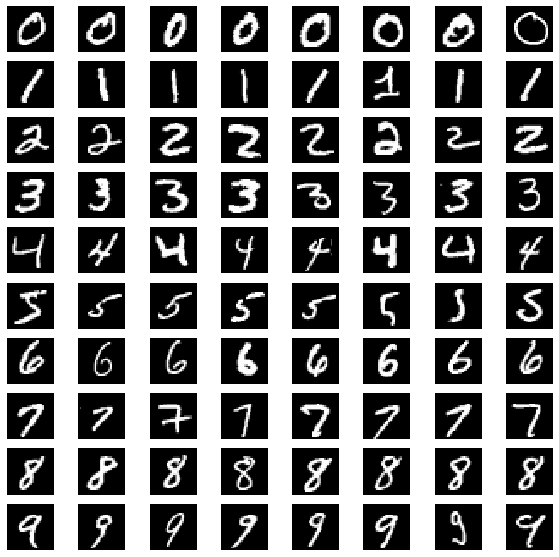

In [6]:
fig, axes = plt.subplots(10,8, figsize=(10,10))

for i in keys:
    for k in range(0,8):
        axes[i,k].imshow(selection[i][k])
        axes[i,k].axis('off')


3)Aplanamiento
La operación Flattense refiere a aplanar un arreglo n-dimensional, es decir, desarmar las estructuras de sus dimensiones y quedarse con todos los valores.

Como no se pierde ningún valor, sólo se reordenan, la nueva dimensión V tiene tamaño $784=H*V=28*28$

In [7]:
flatten_layer = keras.layers.Flatten(input_shape=X_train[0].shape)

d)Entrenamiento del modelo
Entrená  un  modelo  para  clasificar  las  imágenes,  utilizando  una  softmax  en  la  capa  de  salida  y  la entropía cruzada como función de error.  

In [8]:
classes = np.unique(y_train).size

layer1 = keras.layers.Dense(10, activation='relu')
output = keras.layers.Dense(classes, activation='softmax')

model = keras.models.Sequential(
    [
        flatten_layer,
        layer1,
        output,
    ]
)

epochs = 1500

model.compile(
  optimizer= 'adam',
  loss='sparse_categorical_crossentropy', 
  metrics=[
      'accuracy', 
  ], 
)
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                7850      
_________________________________________________________________
dense_2 (Dense)              (None, 10)                110       
Total params: 7,960
Trainable params: 7,960
Non-trainable params: 0
_________________________________________________________________


In [98]:
history = model.fit(
    X_train, 
    y_train, 
    epochs=epochs, 
    batch_size=32, 
    verbose=2, 
    callbacks = [
       keras.callbacks.callbacks.EarlyStopping(
           monitor='val_loss', 
           patience=10,
           verbose=2, 
           mode='auto', 
           restore_best_weights=True
       )
    ],
    validation_data = (X_test, y_test),
    #class_weight = weight # acá va esto? o el de train?
)
model.summary()

Train on 60000 samples, validate on 10000 samples
Epoch 1/1500
 - 2s - loss: 0.3636 - accuracy: 0.9021 - val_loss: 0.4299 - val_accuracy: 0.8866
Epoch 2/1500
 - 3s - loss: 0.3601 - accuracy: 0.9019 - val_loss: 0.4175 - val_accuracy: 0.8957
Epoch 3/1500
 - 2s - loss: 0.3628 - accuracy: 0.9017 - val_loss: 0.4206 - val_accuracy: 0.9006
Epoch 4/1500
 - 2s - loss: 0.3605 - accuracy: 0.9028 - val_loss: 0.4440 - val_accuracy: 0.8905
Epoch 5/1500
 - 2s - loss: 0.3578 - accuracy: 0.9028 - val_loss: 0.4080 - val_accuracy: 0.8954
Epoch 6/1500
 - 2s - loss: 0.3592 - accuracy: 0.9029 - val_loss: 0.3987 - val_accuracy: 0.9004
Epoch 7/1500
 - 2s - loss: 0.3612 - accuracy: 0.9029 - val_loss: 0.4656 - val_accuracy: 0.8825
Epoch 8/1500
 - 3s - loss: 0.3618 - accuracy: 0.9026 - val_loss: 0.4235 - val_accuracy: 0.8919
Epoch 9/1500
 - 2s - loss: 0.3583 - accuracy: 0.9028 - val_loss: 0.4120 - val_accuracy: 0.9013
Epoch 10/1500
 - 3s - loss: 0.3606 - accuracy: 0.9033 - val_loss: 0.4232 - val_accuracy: 0.8958

d)i) Medí el error y el accuracy en el conjunto de test (y el de train).   
Computá la matriz de confusión, pero antes de mirarla ¿qué pares de clases te parece que van a confundirse más?

In [99]:
print(metrics.classification_report(y_test, model.predict_classes(X_test)))

              precision    recall  f1-score   support

           0       0.93      0.97      0.95       980
           1       0.96      0.98      0.97      1135
           2       0.90      0.87      0.89      1032
           3       0.91      0.82      0.86      1010
           4       0.93      0.92      0.93       982
           5       0.83      0.79      0.81       892
           6       0.91      0.93      0.92       958
           7       0.94      0.91      0.93      1028
           8       0.77      0.89      0.83       974
           9       0.90      0.91      0.90      1009

    accuracy                           0.90     10000
   macro avg       0.90      0.90      0.90     10000
weighted avg       0.90      0.90      0.90     10000



In [100]:
print(metrics.confusion_matrix(y_test, model.predict_classes(X_test)))

[[ 952    0    5    0    0    1   10    5    7    0]
 [   1 1109    3    2    1    2    2    2   13    0]
 [  12   11  900    8    8    2   11    9   69    2]
 [   2    0   51  825    1   91    1   12   23    4]
 [   0    1    7    0  901    5   13    4    8   43]
 [  19    1    8   42    6  705   23    3   81    4]
 [  15    3    4    0    7   11  888    0   30    0]
 [   6    9    7   14    8    0    0  939    9   36]
 [  12   13   12    5    5   17   23    5  871   11]
 [   6    7    0    7   29   11    0   19   16  914]]


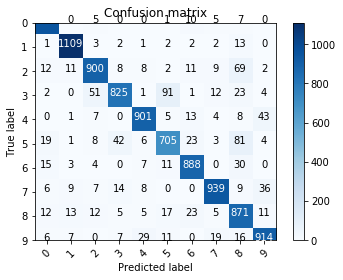

In [101]:
AAPutils.plot_confusion_matrix(y_test, model.predict_classes(X_test))

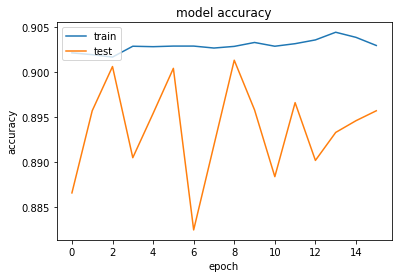

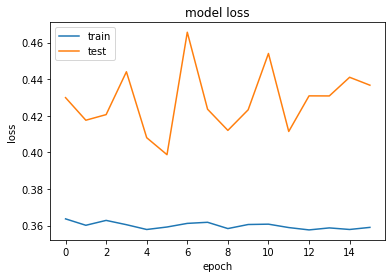

In [102]:
# AAPutils.plot_training_curves(history)
utils.plot_curve(history, "accuracy")
utils.plot_curve(history, "loss")

(leyendo predicted value) y poniendo early-stopping en 50 (llega hasta 100 epochs)
- predijo mucho el 8 cuando era:  2 (64 veces) y 5 (79 veces)
- predijo 2 cuando era 3, 56 veces
- predijo 5 cuando era 3, 98 veces
- predijo 9 cuando era 4 (49 veces) y 7(49 veces)

acc general: .90   
Reporte: (clase, precision, recall, f1, soporte)
- 0       0.95      0.96      0.95       980
- 1       0.97      0.98      0.98      1135
- 2       0.86      0.89      0.88      1032
- 3       0.93      0.82      0.87      1010
- 4       0.94      0.90      0.92       982
- 5       0.83      0.82      0.82       892
- 6       0.92      0.92      0.92       958
- 7       0.96      0.88      0.92      1028
- 8       0.77      0.90      0.83       974
- 9       0.89      0.92      0.90      1009

e)Normalización de las imágenes ( manopla y sklearn )

In [103]:
class Rescaler:
    def __init__(self):
        self.mean = 0
        self.std = 0
        self.fitted = False
        
    def fit(self, X):
        
        self.mean = X.mean()
        self.std = X.std()
        self.fitted = True
    
    def transform(self, X):
        if (not self.fitted):
            raise Exception('Debes ejecutar fit primero')
        return (X - self.mean) / self.std

In [104]:
scaler = Rescaler()
scaler.fit(X_train)

In [105]:
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

Train on 60000 samples, validate on 10000 samples
Epoch 1/1500
 - 2s - loss: 0.6167 - accuracy: 0.8262 - val_loss: 0.3721 - val_accuracy: 0.8968
Epoch 2/1500
 - 2s - loss: 0.3201 - accuracy: 0.9082 - val_loss: 0.2869 - val_accuracy: 0.9172
Epoch 3/1500
 - 2s - loss: 0.2651 - accuracy: 0.9215 - val_loss: 0.2564 - val_accuracy: 0.9225
Epoch 4/1500
 - 2s - loss: 0.2410 - accuracy: 0.9290 - val_loss: 0.2455 - val_accuracy: 0.9269
Epoch 5/1500
 - 2s - loss: 0.2258 - accuracy: 0.9340 - val_loss: 0.2366 - val_accuracy: 0.9303
Epoch 6/1500
 - 2s - loss: 0.2141 - accuracy: 0.9360 - val_loss: 0.2264 - val_accuracy: 0.9340
Epoch 7/1500
 - 2s - loss: 0.2049 - accuracy: 0.9399 - val_loss: 0.2194 - val_accuracy: 0.9351
Epoch 8/1500
 - 2s - loss: 0.1981 - accuracy: 0.9414 - val_loss: 0.2190 - val_accuracy: 0.9368
Epoch 9/1500
 - 2s - loss: 0.1923 - accuracy: 0.9428 - val_loss: 0.2217 - val_accuracy: 0.9341
Epoch 10/1500
 - 2s - loss: 0.1877 - accuracy: 0.9442 - val_loss: 0.2092 - val_accuracy: 0.9391

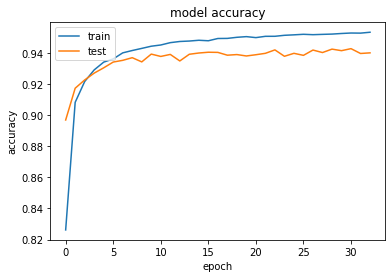

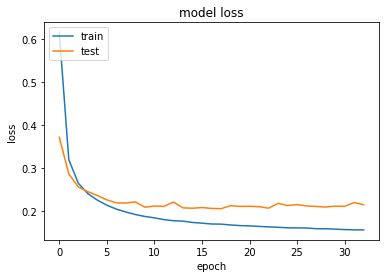

In [106]:
# repetimos todo el proceso anterior en un solo paso: 
history = model.fit(
    X_train, 
    y_train, 
    epochs=epochs, 
    batch_size=32, 
    verbose=2, 
    callbacks = [
       keras.callbacks.callbacks.EarlyStopping(
           monitor='val_loss', 
           patience=15,
           verbose=2, 
           mode='auto', 
           restore_best_weights=True
       )
    ],
    validation_data = (X_test, y_test),
    #class_weight = weight # acá va esto? o el de train?
)

model.summary()
print(metrics.classification_report(y_test, model.predict_classes(X_test)))
print(metrics.confusion_matrix(y_test, model.predict_classes(X_test)))
utils.plot_curve(history, "accuracy")
utils.plot_curve(history, "loss")

Como podemos ver, despues de la normalización, nuestros datos mejoraron notablemente. 
También podemos ver que SIMPLEMENTE tenemos una capa de 10 neuronas!.
Podríamos separa nuestro dataset en train_test_val y quizás mejorar aún más. 
